## 주유소 정보 페이지 띄우기

In [12]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service

url = "https://www.opinet.co.kr/searRgSelect.do"
driver = webdriver.Chrome(service=Service("../driver/chromedriver"))
driver.set_window_size(1400, 1000)

driver.get(url)

## 서울시 내 구 데이터부터 찾기

In [13]:
from selenium.webdriver.common.by import By

sido = driver.find_element(By.ID, "SIDO_NM0")
sido_list = sido.find_elements(By.TAG_NAME, "option")
for idx, sido_name in enumerate(sido_list):
    print(str(idx) + ". " + sido_name.get_attribute("value"))

0. 
1. 서울특별시
2. 부산광역시
3. 대구광역시
4. 인천광역시
5. 광주광역시
6. 대전광역시
7. 울산광역시
8. 세종특별자치시
9. 경기도
10. 강원특별자치도
11. 충청북도
12. 충청남도
13. 전북특별자치도
14. 전라남도
15. 경상북도
16. 경상남도
17. 제주특별자치도


In [14]:
sido_names = [sido_name.get_attribute("value") for sido_name in sido_list]
sido_names

['',
 '서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원특별자치도',
 '충청북도',
 '충청남도',
 '전북특별자치도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [15]:
sido_names = sido_names[1:]
sido_names

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원특별자치도',
 '충청북도',
 '충청남도',
 '전북특별자치도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [16]:
print(sido_names[0])
sido.send_keys(sido_names[0])

서울특별시


In [17]:
gu = driver.find_element(By.ID, "SIGUNGU_NM0")
gu_list = gu.find_elements(By.TAG_NAME, "option")

gu_names = [gu_name.get_attribute("value") for gu_name in gu_list]
print(len(gu_names), gu_names)

26 ['', '강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']


In [18]:
gu_names.remove('')
print(len(gu_names), gu_names)

25 ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']


## 특정 구의 주유소 팝업창 띄우기

In [19]:
gu.send_keys(gu_names[12])

In [20]:
oil_list = driver.find_element(By.ID, "body1")
station = oil_list.find_elements(By.TAG_NAME, "a")

station_temp = station[2]
station_temp.click()

## 팝업창에서 정보 추출

In [21]:
popup = driver.find_element(By.CLASS_NAME, "atlanmap-info-content")

name = popup.find_element(By.ID, "os_nm") # 주유소 이름
phone_num = popup.find_element(By.ID, "phn_no") # 주유소 전화번호
addr = popup.find_element(By.ID, "rd_addr") # 주유소 주소
brand = popup.find_element(By.ID, "poll_div_nm") # 주유소 상표

# 유가정보
price_table = popup.find_element(By.ID, "infoTbody")
price_cont = price_table.find_elements(By.TAG_NAME, "tr")
price_info = {}
for line in price_cont:
    oil_type = line.find_elements(By.TAG_NAME, "td")[0].text # 유종
    oil_price = line.find_elements(By.TAG_NAME, "td")[1].find_element(By.TAG_NAME, "label").text # 가격

    price_info[oil_type] = oil_price

# 부가정보
service = popup.find_element(By.CLASS_NAME, "service")
service_img = service.find_elements(By.TAG_NAME, "img")
service_list = []
for img in service_img:
    # image 이름 기준으로 부가 서비스 유무 파악
    if "off" not in img.get_attribute("src"):
        service_list.append(img.get_attribute("alt"))

# 각 정보 출력
print(name.text)
print(phone_num.text)
print(addr.text)
print(brand.text)

for key, value in price_info.items():
    print(key, value)

print(service_list)

성산대교셀프주유소
02-323-0078
서울 마포구 성산로 144
HD현대오일뱅크
 
보통휘발유 1,659
경유 1,569
실내등유 1,649
['세차장', '경정비']


## 특정 구 안에서 정보 추출 테스트

In [22]:
import time
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

oil_list = driver.find_element(By.ID, "body1")
stations = oil_list.find_elements(By.TAG_NAME, "a")

name_list = []
phn_list = []
addr_list = []
brand_list = []
price_list = []
service_list = []

for station in stations:
    station.click()
    time.sleep(0.5)

    popup = WebDriverWait(driver, 3).until(
        EC.presence_of_element_located((By.CLASS_NAME, "atlanmap-info-content")))

    name = popup.find_element(By.ID, "os_nm") # 주유소 이름
    phone_num = popup.find_element(By.ID, "phn_no") # 주유소 전화번호
    addr = popup.find_element(By.ID, "rd_addr") # 주유소 주소
    brand = popup.find_element(By.ID, "poll_div_nm") # 주유소 상표
    time.sleep(0.5)

    # 유가정보
    price_table = WebDriverWait(driver, 3).until(
                EC.presence_of_element_located((By.ID, "infoTbody")))
    price_cont = price_table.find_elements(By.TAG_NAME, "tr")
    price_info = {}
    for line in price_cont:
        oil_type = line.find_elements(By.TAG_NAME, "td")[0].text # 유종
        oil_price = line.find_elements(By.TAG_NAME, "td")[1].find_element(By.TAG_NAME, "label").text # 가격

        price_info[oil_type] = oil_price

    # 부가정보
    service = popup.find_element(By.CLASS_NAME, "service")
    service_img = service.find_elements(By.TAG_NAME, "img")
    services = []
    for img in service_img:
        # image 이름 기준으로 부가 서비스 유무 파악
        if "off" not in img.get_attribute("src"):
            services.append(img.get_attribute("alt"))

    name_list.append(name.text)
    phn_list.append(phone_num.text)
    addr_list.append(addr.text)
    brand_list.append(brand.text)
    price_list.append(price_info)
    service_list.append(services)


In [23]:
# 리스트 길이 확인
len(name_list), len(phn_list), len(addr_list), len(brand_list), len(price_list), len(service_list)

(12, 12, 12, 12, 12, 12)

In [24]:
print(name_list[0])

(주)타이거통상 월드컵주유소


## Dataframe 변환 연습(특정 구만)

In [25]:
# dataframe으로 변환
import pandas as pd

# 리스트를 문자열로 변환하는 함수
def clean_list_to_string(x):
    if isinstance(x, list):
        return ", ".join(x)  # 리스트의 요소들을 쉼표로 구분하여 문자열로 변환
    return x

oil_data = {'상호':name_list, 
            '전화번호':phn_list, 
            "주소":addr_list,
            "상표":brand_list,
            "유종별 가격":price_list,
            "부가정보":service_list}

oil_df = pd.DataFrame(oil_data)

oil_df.sort_index(inplace=True)
oil_df['부가정보'] = oil_df['부가정보'].apply(clean_list_to_string)

oil_df

,상호,전화번호,주소,상표,유종별 가격,부가정보
0,(주)타이거통상 월드컵주유소,070-4121-0021,서울 마포구 월드컵북로 170 (성산제2동),S-OIL,"{'고급휘발유': '1,879', '보통휘발유': '1,649', '경유': '1,...",
1,마포시엠주유소,02-338-9447,서울 마포구 월드컵북로 62,SK에너지,"{'': '', '보통휘발유': '1,659', '경유': '1,539'}",
2,성산대교셀프주유소,02-323-0078,서울 마포구 성산로 144,HD현대오일뱅크,"{'': '', '보통휘발유': '1,659', '경유': '1,569', '실내등...","세차장, 경정비"
3,청원주유소,02-325-5533,서울 마포구 월드컵북로 113 (성산동),HD현대오일뱅크,"{'고급휘발유': '1,978', '보통휘발유': '1,659', '경유': '1,...",세차장
4,(주)안국에너지 망원동주유소,02-334-0917,서울 마포구 월드컵로 119 (망원동),SK에너지,"{'': '', '보통휘발유': '1,758', '경유': '1,628'}",세차장
5,에쓰오일(주) 염리동주유소,02-3272-5155,서울 마포구 백범로 126 (염리동),S-OIL,"{'': '', '보통휘발유': '1,779', '경유': '1,669'}",세차장
6,용강주유소,070-7795-4800,서울 마포구 토정로 258,S-OIL,"{'': '', '보통휘발유': '1,779', '경유': '1,669', '실내등...",
7,마포주유소,02-711-5189,서울 마포구 마포대로 186,S-OIL,"{'고급휘발유': '1,942', '보통휘발유': '1,792', '경유': '1,...",세차장
8,에스에스오토셀프,02-336-5185,서울 마포구 서강로 76 (창전동),HD현대오일뱅크,"{'고급휘발유': '2,098', '보통휘발유': '1,799', '경유': '1,...","세차장, 24시영업"
9,(주)만성상사 대흥주유소,02-3273-5151,서울 마포구 대흥로 61 (대흥동),SK에너지,"{'고급휘발유': '2,199', '보통휘발유': '1,799', '경유': '1,...","세차장, 24시영업"


In [26]:
# 유종별 가격 열 변환
oil_df = pd.concat([oil_df.drop(columns=['유종별 가격']), oil_df['유종별 가격'].apply(pd.Series)], axis=1)
oil_df

,상호,전화번호,주소,상표,부가정보,고급휘발유,보통휘발유,경유,,실내등유
0,(주)타이거통상 월드컵주유소,070-4121-0021,서울 마포구 월드컵북로 170 (성산제2동),S-OIL,,"1,879","1,649","1,529",,NaN
1,마포시엠주유소,02-338-9447,서울 마포구 월드컵북로 62,SK에너지,,NaN,"1,659","1,539",,NaN
2,성산대교셀프주유소,02-323-0078,서울 마포구 성산로 144,HD현대오일뱅크,"세차장, 경정비",NaN,"1,659","1,569",,"1,649"
3,청원주유소,02-325-5533,서울 마포구 월드컵북로 113 (성산동),HD현대오일뱅크,세차장,"1,978","1,659","1,569",,NaN
4,(주)안국에너지 망원동주유소,02-334-0917,서울 마포구 월드컵로 119 (망원동),SK에너지,세차장,NaN,"1,758","1,628",,NaN
5,에쓰오일(주) 염리동주유소,02-3272-5155,서울 마포구 백범로 126 (염리동),S-OIL,세차장,NaN,"1,779","1,669",,NaN
6,용강주유소,070-7795-4800,서울 마포구 토정로 258,S-OIL,,NaN,"1,779","1,669",,"1,650"
7,마포주유소,02-711-5189,서울 마포구 마포대로 186,S-OIL,세차장,"1,942","1,792","1,682",,NaN
8,에스에스오토셀프,02-336-5185,서울 마포구 서강로 76 (창전동),HD현대오일뱅크,"세차장, 24시영업","2,098","1,799","1,689",,NaN
9,(주)만성상사 대흥주유소,02-3273-5151,서울 마포구 대흥로 61 (대흥동),SK에너지,"세차장, 24시영업","2,199","1,799","1,689",,"1,745"


## 서울 시내 전체에 적용해보기

In [28]:
from tqdm.notebook import tqdm

def get_station_info(gu_names):
    name_list = []
    phn_list = []
    addr_list = []
    brand_list = []
    price_list = []
    service_list = []
    
    for idx, gu_name in tqdm(enumerate(gu_names), total=len(gu_names)):
        gu = driver.find_element(By.ID, "SIGUNGU_NM0")
        gu.send_keys(gu_name)
        time.sleep(3)
        driver.refresh()

        oil_list = driver.find_element(By.ID, "body1")
        stations = oil_list.find_elements(By.TAG_NAME, "a")

        for station in tqdm(stations):
            station = WebDriverWait(driver, 10).until(
                EC.element_to_be_clickable(station)
            )
            driver.execute_script("arguments[0].click()", station)
            time.sleep(3)

            popup = WebDriverWait(driver, 3).until(
                EC.presence_of_element_located((By.CLASS_NAME, "atlanmap-info-content")))

            name = popup.find_element(By.ID, "os_nm") # 주유소 이름
            phone_num = popup.find_element(By.ID, "phn_no") # 주유소 전화번호
            addr = popup.find_element(By.ID, "rd_addr") # 주유소 주소
            brand = popup.find_element(By.ID, "poll_div_nm") # 주유소 상표

            # 유가정보
            price_table = WebDriverWait(driver, 3).until(
                EC.presence_of_element_located((By.ID, "infoTbody")))
            price_cont = price_table.find_elements(By.TAG_NAME, "tr")
            price_info = {}
            for line in price_cont:
                oil_type = line.find_elements(By.TAG_NAME, "td")[0] # 유종
                oil_price = line.find_elements(
                    By.TAG_NAME, "td")[1].find_element(By.TAG_NAME, "label") # 가격
                
                price_info[oil_type.text] = oil_price.text
            

            # 부가정보
            service = WebDriverWait(driver, 3).until(
                EC.presence_of_element_located((By.CLASS_NAME, "service")))
            service_img = service.find_elements(By.TAG_NAME, "img")
            services = []
            for img in service_img:
                # image 이름 기준으로 부가 서비스 유무 파악
                if "off" not in img.get_attribute("src"):
                    services.append(img.get_attribute("alt"))

            name_list.append(name.text)
            phn_list.append(phone_num.text)
            addr_list.append(addr.text)
            brand_list.append(brand.text)
            price_list.append(price_info)
            service_list.append(services)

            time.sleep(1)

    return name_list, phn_list, addr_list, brand_list, price_list, service_list

In [29]:
total_name, total_phn, total_addr, total_brand, total_price, total_service = get_station_info(gu_names)
# 리스트 길이 확인
len(total_name), len(total_phn), len(total_addr), len(total_brand), len(total_price), len(total_service)


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

(421, 421, 421, 421, 421, 421)

## 전체 데이터 Dataframe으로 변환 및 정보 수정

In [30]:
seoul_oil_data = {'상호':total_name, 
            '전화번호':total_phn, 
            "주소":total_addr,
            "상표":total_brand,
            "유종별 가격":total_price,
            "부가정보":total_service}

seoul_oil_df = pd.DataFrame(seoul_oil_data)

seoul_oil_df.sort_index(inplace=True)
seoul_oil_df['부가정보'] = seoul_oil_df['부가정보'].apply(clean_list_to_string) # 문자열 형태로 표시

# 유종별 가격 열 변환
seoul_oil_df = pd.concat(
    [seoul_oil_df.drop(columns=['유종별 가격']), seoul_oil_df['유종별 가격'].apply(pd.Series)], axis=1)

seoul_oil_df.head(20)

,상호,전화번호,주소,상표,부가정보,고급휘발유,보통휘발유,경유,,실내등유
0,지에스칼텍스㈜ 은마주유소,02-3452-1882,서울 강남구 영동대로 235,GS칼텍스,"세차장, 경정비","1,919","1,719","1,699",,NaN
1,HD현대오일뱅크㈜직영 강남셀프주유소,02-3462-0018,서울 강남구 도곡로 208,HD현대오일뱅크,세차장,"1,899","1,719","1,638",,NaN
2,오일프러스 셀프,02-3462-5100,서울 강남구 남부순환로 2651 (도곡동),SK에너지,"세차장, 경정비, 24시영업","1,899","1,719","1,638",,NaN
3,(주)보성 세곡주유소,02-445-6870,서울 강남구 헌릉로 731 (세곡동),SK에너지,세차장,"1,928","1,728","1,589",,NaN
4,방죽주유소,02-459-3434,서울 강남구 밤고개로 215 (율현동),GS칼텍스,세차장,NaN,"1,737","1,609",,NaN
5,HD현대오일뱅크㈜직영 도곡셀프주유소,02-529-5101,서울 강남구 남부순환로 2718,HD현대오일뱅크,"세차장, 경정비","1,879","1,739","1,638",,NaN
6,HD현대오일뱅크㈜직영 산성셀프주유소,02-2226-4963,서울 강남구 헌릉로 730,HD현대오일뱅크,세차장,"1,969","1,748","1,618",,NaN
7,HD현대오일뱅크㈜직영 유진주유소,02-3462-5215,서울 강남구 논현로 152 (도곡동),HD현대오일뱅크,"세차장, 경정비","1,914","1,749","1,653",,"1,640"
8,(주)선진도곡주유소,02-2058-3024,서울 강남구 도곡로 162 (도곡동),S-OIL,"세차장, 경정비","1,944","1,764","1,658",,NaN
9,극동유화㈜ 개나리주유소,02-564-0186,서울 강남구 언주로 423 (역삼동),S-OIL,"세차장, 경정비, 24시영업","1,995","1,775","1,625",,NaN


In [31]:
seoul_oil_df["구"] = [address.split()[1] for address in seoul_oil_df["주소"]]
seoul_oil_df.head()

,상호,전화번호,주소,상표,부가정보,고급휘발유,보통휘발유,경유,,실내등유,구
0,지에스칼텍스㈜ 은마주유소,02-3452-1882,서울 강남구 영동대로 235,GS칼텍스,"세차장, 경정비","1,919","1,719","1,699",,NaN,강남구
1,HD현대오일뱅크㈜직영 강남셀프주유소,02-3462-0018,서울 강남구 도곡로 208,HD현대오일뱅크,세차장,"1,899","1,719","1,638",,NaN,강남구
2,오일프러스 셀프,02-3462-5100,서울 강남구 남부순환로 2651 (도곡동),SK에너지,"세차장, 경정비, 24시영업","1,899","1,719","1,638",,NaN,강남구
3,(주)보성 세곡주유소,02-445-6870,서울 강남구 헌릉로 731 (세곡동),SK에너지,세차장,"1,928","1,728","1,589",,NaN,강남구
4,방죽주유소,02-459-3434,서울 강남구 밤고개로 215 (율현동),GS칼텍스,세차장,NaN,"1,737","1,609",,NaN,강남구


In [32]:
# 25개 구 모두 있는지 확인
seoul_oil_df["구"].unique(), len(seoul_oil_df["구"].unique())

(array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
        '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
        '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object),
 25)

In [56]:
# 웹 드라이버 종료
driver.quit()

## Dataframe 정보 수정

In [34]:
# Dataframe 정보 확인
seoul_oil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상호      421 non-null    object
 1   전화번호    421 non-null    object
 2   주소      421 non-null    object
 3   상표      421 non-null    object
 4   부가정보    421 non-null    object
 5   고급휘발유   252 non-null    object
 6   보통휘발유   421 non-null    object
 7   경유      421 non-null    object
 8           421 non-null    object
 9   실내등유    115 non-null    object
 10  구       421 non-null    object
dtypes: object(11)
memory usage: 36.3+ KB


In [35]:
# NaN을 0으로 대체
seoul_oil_df.fillna('0', inplace=True)
seoul_oil_df.head()

,상호,전화번호,주소,상표,부가정보,고급휘발유,보통휘발유,경유,,실내등유,구
0,지에스칼텍스㈜ 은마주유소,02-3452-1882,서울 강남구 영동대로 235,GS칼텍스,"세차장, 경정비","1,919","1,719","1,699",,0,강남구
1,HD현대오일뱅크㈜직영 강남셀프주유소,02-3462-0018,서울 강남구 도곡로 208,HD현대오일뱅크,세차장,"1,899","1,719","1,638",,0,강남구
2,오일프러스 셀프,02-3462-5100,서울 강남구 남부순환로 2651 (도곡동),SK에너지,"세차장, 경정비, 24시영업","1,899","1,719","1,638",,0,강남구
3,(주)보성 세곡주유소,02-445-6870,서울 강남구 헌릉로 731 (세곡동),SK에너지,세차장,"1,928","1,728","1,589",,0,강남구
4,방죽주유소,02-459-3434,서울 강남구 밤고개로 215 (율현동),GS칼텍스,세차장,0,"1,737","1,609",,0,강남구


In [36]:
seoul_oil_df['고급휘발유'] = seoul_oil_df['고급휘발유'].str.replace(',','')
seoul_oil_df['보통휘발유'] = seoul_oil_df['보통휘발유'].str.replace(',','')
seoul_oil_df['경유'] = seoul_oil_df['경유'].str.replace(',','')
seoul_oil_df['실내등유'] = seoul_oil_df['실내등유'].str.replace(',','')

seoul_oil_df = seoul_oil_df.astype({'고급휘발유':'float64',
                                    '보통휘발유':'float64',
                                    '경유':'float64',
                                    '실내등유':'float64'})

seoul_oil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상호      421 non-null    object 
 1   전화번호    421 non-null    object 
 2   주소      421 non-null    object 
 3   상표      421 non-null    object 
 4   부가정보    421 non-null    object 
 5   고급휘발유   421 non-null    float64
 6   보통휘발유   421 non-null    float64
 7   경유      421 non-null    float64
 8           421 non-null    object 
 9   실내등유    421 non-null    float64
 10  구       421 non-null    object 
dtypes: float64(4), object(7)
memory usage: 36.3+ KB


In [39]:
# 빈 열 제거
seoul_oil_df.drop(seoul_oil_df.columns[8], axis=1)
seoul_oil_df.head(10)

,상호,전화번호,주소,상표,부가정보,고급휘발유,보통휘발유,경유,,실내등유,구
0,지에스칼텍스㈜ 은마주유소,02-3452-1882,서울 강남구 영동대로 235,GS칼텍스,"세차장, 경정비",1919.0,1719.0,1699.0,,0.0,강남구
1,HD현대오일뱅크㈜직영 강남셀프주유소,02-3462-0018,서울 강남구 도곡로 208,HD현대오일뱅크,세차장,1899.0,1719.0,1638.0,,0.0,강남구
2,오일프러스 셀프,02-3462-5100,서울 강남구 남부순환로 2651 (도곡동),SK에너지,"세차장, 경정비, 24시영업",1899.0,1719.0,1638.0,,0.0,강남구
3,(주)보성 세곡주유소,02-445-6870,서울 강남구 헌릉로 731 (세곡동),SK에너지,세차장,1928.0,1728.0,1589.0,,0.0,강남구
4,방죽주유소,02-459-3434,서울 강남구 밤고개로 215 (율현동),GS칼텍스,세차장,0.0,1737.0,1609.0,,0.0,강남구
5,HD현대오일뱅크㈜직영 도곡셀프주유소,02-529-5101,서울 강남구 남부순환로 2718,HD현대오일뱅크,"세차장, 경정비",1879.0,1739.0,1638.0,,0.0,강남구
6,HD현대오일뱅크㈜직영 산성셀프주유소,02-2226-4963,서울 강남구 헌릉로 730,HD현대오일뱅크,세차장,1969.0,1748.0,1618.0,,0.0,강남구
7,HD현대오일뱅크㈜직영 유진주유소,02-3462-5215,서울 강남구 논현로 152 (도곡동),HD현대오일뱅크,"세차장, 경정비",1914.0,1749.0,1653.0,,1640.0,강남구
8,(주)선진도곡주유소,02-2058-3024,서울 강남구 도곡로 162 (도곡동),S-OIL,"세차장, 경정비",1944.0,1764.0,1658.0,,0.0,강남구
9,극동유화㈜ 개나리주유소,02-564-0186,서울 강남구 언주로 423 (역삼동),S-OIL,"세차장, 경정비, 24시영업",1995.0,1775.0,1625.0,,0.0,강남구


## 분석 1. 각 유종별 유가 분석 및 시각화

In [41]:
# 보통휘발유 가격 상위 10개
seoul_oil_df.sort_values(by="보통휘발유", ascending=False).head(10)

,상호,전화번호,주소,상표,부가정보,고급휘발유,보통휘발유,경유,,실내등유,구
408,서남주유소,02-752-9475,서울 중구 통일로 30,SK에너지,"세차장, 24시영업",3156.0,2756.0,2632.0,,2179.0,중구
29,(주)만정에너지 삼보주유소,02-518-5141,서울 강남구 봉은사로 433 (삼성동),GS칼텍스,세차장,2860.0,2620.0,2580.0,,1850.0,강남구
28,(주)제이제이네트웍스 제이제이주유소,02-518-5631,서울 강남구 언주로 716,HD현대오일뱅크,"세차장, 24시영업",2768.0,2548.0,2290.0,,0.0,강남구
407,필동주유소,02-2267-8025,서울 중구 퇴계로 196,GS칼텍스,24시영업,2789.0,2539.0,2409.0,,1809.0,중구
27,SK논현주유소,02-511-0955,서울 강남구 논현로 747 (논현동),SK에너지,"세차장, 경정비, 24시영업",2670.0,2435.0,2270.0,,1840.0,강남구
26,(주)소모 쎈트럴주유소,02-565-0267,서울 강남구 삼성로 335,GS칼텍스,세차장,2588.0,2388.0,2168.0,,1550.0,강남구
399,(주)대양씨앤씨 사직주유소,02-735-4858,서울 종로구 사직로 65,GS칼텍스,,2575.0,2375.0,2195.0,,1800.0,종로구
376,한석주유소,02-790-1020,서울 용산구 이촌로 164,SK에너지,"세차장, 24시영업",2502.0,2310.0,2192.0,,0.0,용산구
375,에너비스,070-8707-4572,서울 용산구 한남대로 82 (한남동),SK에너지,세차장,2497.0,2297.0,2197.0,,0.0,용산구
374,한남지점,070-8707-4586,서울 용산구 한남대로21길 4 (한남동),SK에너지,,2497.0,2297.0,2197.0,,0.0,용산구


In [42]:
# 경유 가격 상위 10개
seoul_oil_df.sort_values(by="경유", ascending=False).head(10)

,상호,전화번호,주소,상표,부가정보,고급휘발유,보통휘발유,경유,,실내등유,구
408,서남주유소,02-752-9475,서울 중구 통일로 30,SK에너지,"세차장, 24시영업",3156.0,2756.0,2632.0,,2179.0,중구
29,(주)만정에너지 삼보주유소,02-518-5141,서울 강남구 봉은사로 433 (삼성동),GS칼텍스,세차장,2860.0,2620.0,2580.0,,1850.0,강남구
407,필동주유소,02-2267-8025,서울 중구 퇴계로 196,GS칼텍스,24시영업,2789.0,2539.0,2409.0,,1809.0,중구
28,(주)제이제이네트웍스 제이제이주유소,02-518-5631,서울 강남구 언주로 716,HD현대오일뱅크,"세차장, 24시영업",2768.0,2548.0,2290.0,,0.0,강남구
27,SK논현주유소,02-511-0955,서울 강남구 논현로 747 (논현동),SK에너지,"세차장, 경정비, 24시영업",2670.0,2435.0,2270.0,,1840.0,강남구
375,에너비스,070-8707-4572,서울 용산구 한남대로 82 (한남동),SK에너지,세차장,2497.0,2297.0,2197.0,,0.0,용산구
374,한남지점,070-8707-4586,서울 용산구 한남대로21길 4 (한남동),SK에너지,,2497.0,2297.0,2197.0,,0.0,용산구
399,(주)대양씨앤씨 사직주유소,02-735-4858,서울 종로구 사직로 65,GS칼텍스,,2575.0,2375.0,2195.0,,1800.0,종로구
365,SJ오일(주) 여의도주유소,02-785-8201,서울 영등포구 은행로 64,GS칼텍스,"세차장, 충전소, 편의점, 24시영업",2410.0,2255.0,2195.0,,1750.0,영등포구
376,한석주유소,02-790-1020,서울 용산구 이촌로 164,SK에너지,"세차장, 24시영업",2502.0,2310.0,2192.0,,0.0,용산구


In [43]:
# 고급휘발유 가격 상위 10개
seoul_oil_df.sort_values(by="고급휘발유", ascending=False).head(10)

,상호,전화번호,주소,상표,부가정보,고급휘발유,보통휘발유,경유,,실내등유,구
408,서남주유소,02-752-9475,서울 중구 통일로 30,SK에너지,"세차장, 24시영업",3156.0,2756.0,2632.0,,2179.0,중구
29,(주)만정에너지 삼보주유소,02-518-5141,서울 강남구 봉은사로 433 (삼성동),GS칼텍스,세차장,2860.0,2620.0,2580.0,,1850.0,강남구
407,필동주유소,02-2267-8025,서울 중구 퇴계로 196,GS칼텍스,24시영업,2789.0,2539.0,2409.0,,1809.0,중구
28,(주)제이제이네트웍스 제이제이주유소,02-518-5631,서울 강남구 언주로 716,HD현대오일뱅크,"세차장, 24시영업",2768.0,2548.0,2290.0,,0.0,강남구
27,SK논현주유소,02-511-0955,서울 강남구 논현로 747 (논현동),SK에너지,"세차장, 경정비, 24시영업",2670.0,2435.0,2270.0,,1840.0,강남구
26,(주)소모 쎈트럴주유소,02-565-0267,서울 강남구 삼성로 335,GS칼텍스,세차장,2588.0,2388.0,2168.0,,1550.0,강남구
25,㈜새서울석유 새서울주유소,02-543-1154,서울 강남구 압구정로 154,HD현대오일뱅크,"세차장, 24시영업",2577.0,2288.0,2098.0,,0.0,강남구
399,(주)대양씨앤씨 사직주유소,02-735-4858,서울 종로구 사직로 65,GS칼텍스,,2575.0,2375.0,2195.0,,1800.0,종로구
264,(주)옥수하이웨이스테이션,02-2282-5151,서울 성동구 독서당로 168 (옥수동),GS칼텍스,,2521.0,2268.0,2077.0,,0.0,성동구
376,한석주유소,02-790-1020,서울 용산구 이촌로 164,SK에너지,"세차장, 24시영업",2502.0,2310.0,2192.0,,0.0,용산구


In [44]:
# 실내등유 가격 상위 10개
seoul_oil_df.sort_values(by="실내등유", ascending=False).head(10)

,상호,전화번호,주소,상표,부가정보,고급휘발유,보통휘발유,경유,,실내등유,구
408,서남주유소,02-752-9475,서울 중구 통일로 30,SK에너지,"세차장, 24시영업",3156.0,2756.0,2632.0,,2179.0,중구
23,대청주유소,02-445-5500,서울 강남구 개포로 654 (일원동),SK에너지,세차장,0.0,2266.0,2096.0,,1869.0,강남구
29,(주)만정에너지 삼보주유소,02-518-5141,서울 강남구 봉은사로 433 (삼성동),GS칼텍스,세차장,2860.0,2620.0,2580.0,,1850.0,강남구
27,SK논현주유소,02-511-0955,서울 강남구 논현로 747 (논현동),SK에너지,"세차장, 경정비, 24시영업",2670.0,2435.0,2270.0,,1840.0,강남구
407,필동주유소,02-2267-8025,서울 중구 퇴계로 196,GS칼텍스,24시영업,2789.0,2539.0,2409.0,,1809.0,중구
207,(주)창원이엔지 홍제지점,02-379-0753,서울 서대문구 통일로 455 (홍제동),HD현대오일뱅크,,0.0,1665.0,1549.0,,1800.0,서대문구
399,(주)대양씨앤씨 사직주유소,02-735-4858,서울 종로구 사직로 65,GS칼텍스,,2575.0,2375.0,2195.0,,1800.0,종로구
263,청계로주유소,02-2294-4225,서울 성동구 청계천로 454 (하왕십리동),SK에너지,세차장,0.0,2195.0,2095.0,,1795.0,성동구
130,구로주유소,02-857-1251,서울 구로구 구로동로 137 (구로동),GS칼텍스,,0.0,2290.0,2140.0,,1790.0,구로구
248,(주)선문에너지 중앙주유소,02-575-5110,서울특별시 서초구 바우뫼로 219 (양재1동),HD현대오일뱅크,세차장,2468.0,2258.0,1998.0,,1780.0,서초구


/tmp/ipykernel_2267/397004747.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="구", y="보통휘발유", data=seoul_oil_df, palette="Set3")


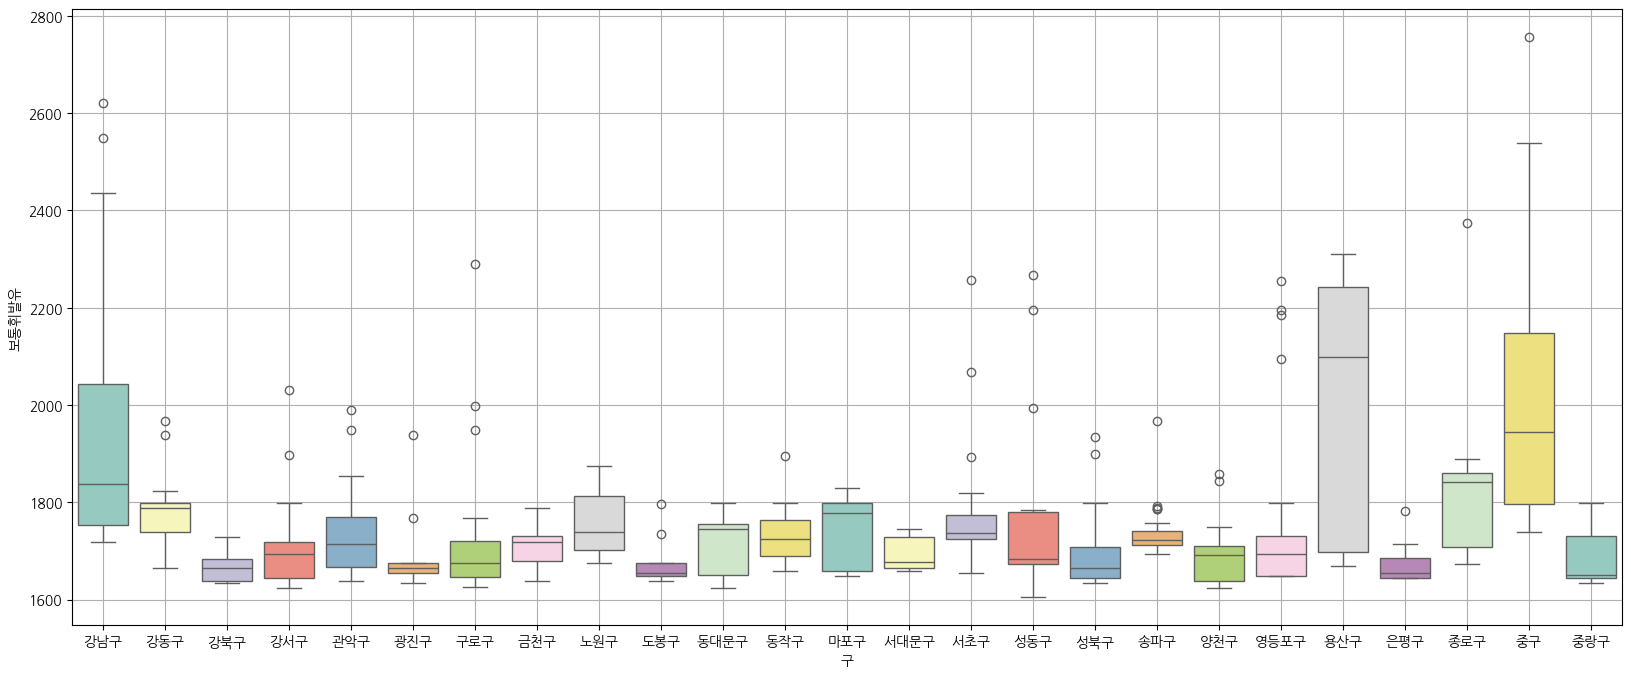

In [54]:
# 구에 따른 보통휘발유 가격 추이
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

plt.figure(figsize=(20, 8))
sns.boxplot(x="구", y="보통휘발유", data=seoul_oil_df, palette="Set3")
plt.grid(True)
plt.show()

/tmp/ipykernel_2267/3795133055.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="구", y="경유", data=seoul_oil_df, palette="Set3")


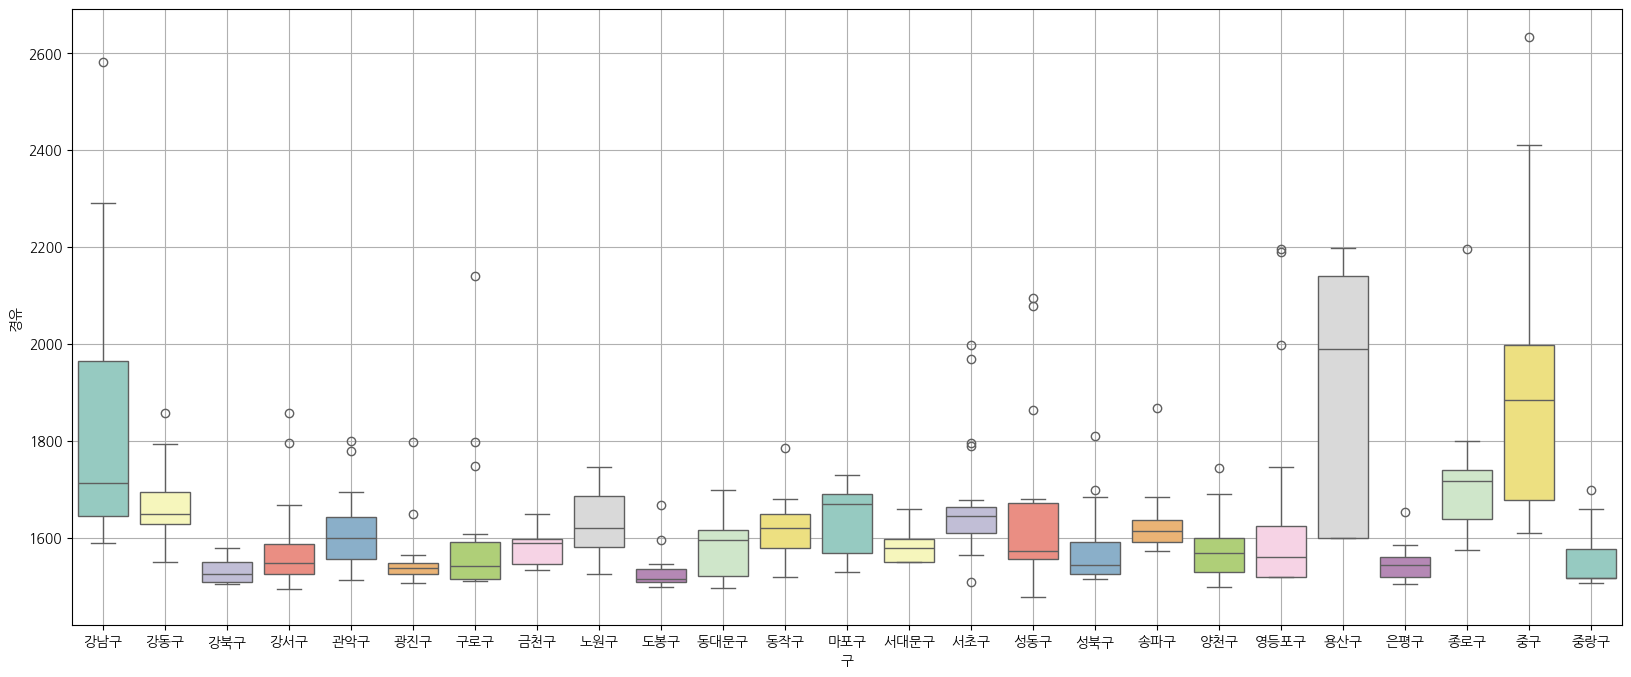

In [55]:
# 구에 따른 경유 가격 추이
plt.figure(figsize=(20, 8))
sns.boxplot(x="구", y="경유", data=seoul_oil_df, palette="Set3")
plt.grid(True)
plt.show()

## 분석 2. 다른 시각들로 보는 시각화

In [68]:
# 세차장 유무 여부 열 추가
def has_carwash(service_info):
    if pd.isna(service_info):
        return 'X'
    return 'O' if '세차장' in service_info else 'X'

seoul_oil_df['세차장'] = seoul_oil_df['부가정보'].apply(has_carwash)

seoul_oil_df.head(10)

,상호,전화번호,주소,상표,부가정보,고급휘발유,보통휘발유,경유,,실내등유,구,세차장
0,지에스칼텍스㈜ 은마주유소,02-3452-1882,서울 강남구 영동대로 235,GS칼텍스,"세차장, 경정비",1919.0,1719.0,1699.0,,0.0,강남구,O
1,HD현대오일뱅크㈜직영 강남셀프주유소,02-3462-0018,서울 강남구 도곡로 208,HD현대오일뱅크,세차장,1899.0,1719.0,1638.0,,0.0,강남구,O
2,오일프러스 셀프,02-3462-5100,서울 강남구 남부순환로 2651 (도곡동),SK에너지,"세차장, 경정비, 24시영업",1899.0,1719.0,1638.0,,0.0,강남구,O
3,(주)보성 세곡주유소,02-445-6870,서울 강남구 헌릉로 731 (세곡동),SK에너지,세차장,1928.0,1728.0,1589.0,,0.0,강남구,O
4,방죽주유소,02-459-3434,서울 강남구 밤고개로 215 (율현동),GS칼텍스,세차장,0.0,1737.0,1609.0,,0.0,강남구,O
5,HD현대오일뱅크㈜직영 도곡셀프주유소,02-529-5101,서울 강남구 남부순환로 2718,HD현대오일뱅크,"세차장, 경정비",1879.0,1739.0,1638.0,,0.0,강남구,O
6,HD현대오일뱅크㈜직영 산성셀프주유소,02-2226-4963,서울 강남구 헌릉로 730,HD현대오일뱅크,세차장,1969.0,1748.0,1618.0,,0.0,강남구,O
7,HD현대오일뱅크㈜직영 유진주유소,02-3462-5215,서울 강남구 논현로 152 (도곡동),HD현대오일뱅크,"세차장, 경정비",1914.0,1749.0,1653.0,,1640.0,강남구,O
8,(주)선진도곡주유소,02-2058-3024,서울 강남구 도곡로 162 (도곡동),S-OIL,"세차장, 경정비",1944.0,1764.0,1658.0,,0.0,강남구,O
9,극동유화㈜ 개나리주유소,02-564-0186,서울 강남구 언주로 423 (역삼동),S-OIL,"세차장, 경정비, 24시영업",1995.0,1775.0,1625.0,,0.0,강남구,O


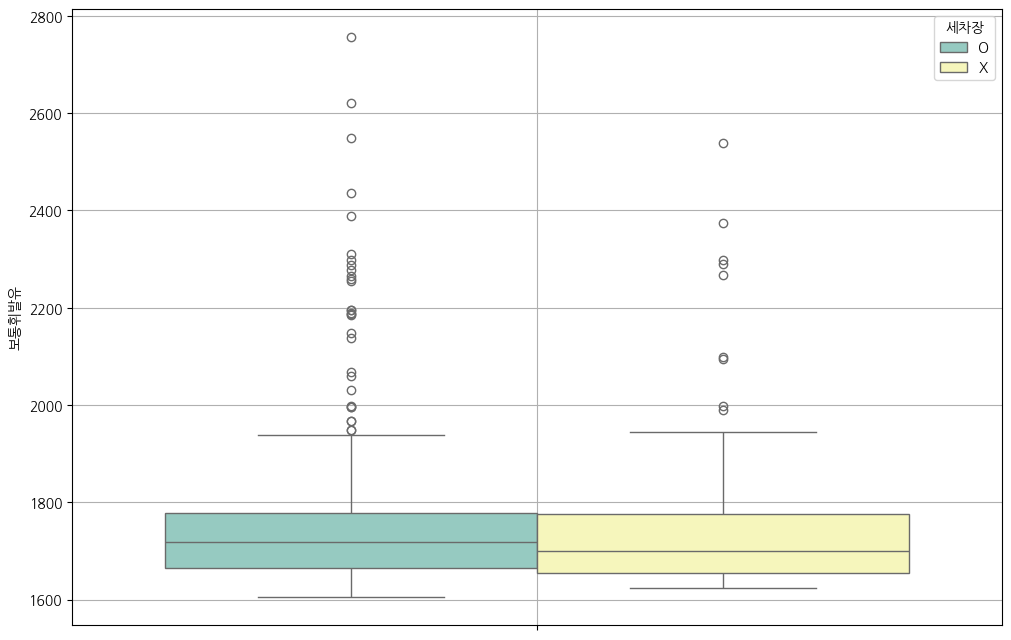

In [70]:
#세차장 유무에 따른 유가(보통휘발유) 추이
plt.figure(figsize=(12,8))
sns.boxplot(hue="세차장", y="보통휘발유", data=seoul_oil_df, palette="Set3")
plt.grid(True)
plt.show()

In [71]:
# 24시간 영업 유무 여부 열 추가
def has_24h(service_info):
    if pd.isna(service_info):
        return 'X'
    return 'O' if '24시영업' in service_info else 'X'

seoul_oil_df['24시영업'] = seoul_oil_df['부가정보'].apply(has_24h)

seoul_oil_df.head(10)

,상호,전화번호,주소,상표,부가정보,고급휘발유,보통휘발유,경유,,실내등유,구,세차장,24시영업
0,지에스칼텍스㈜ 은마주유소,02-3452-1882,서울 강남구 영동대로 235,GS칼텍스,"세차장, 경정비",1919.0,1719.0,1699.0,,0.0,강남구,O,X
1,HD현대오일뱅크㈜직영 강남셀프주유소,02-3462-0018,서울 강남구 도곡로 208,HD현대오일뱅크,세차장,1899.0,1719.0,1638.0,,0.0,강남구,O,X
2,오일프러스 셀프,02-3462-5100,서울 강남구 남부순환로 2651 (도곡동),SK에너지,"세차장, 경정비, 24시영업",1899.0,1719.0,1638.0,,0.0,강남구,O,O
3,(주)보성 세곡주유소,02-445-6870,서울 강남구 헌릉로 731 (세곡동),SK에너지,세차장,1928.0,1728.0,1589.0,,0.0,강남구,O,X
4,방죽주유소,02-459-3434,서울 강남구 밤고개로 215 (율현동),GS칼텍스,세차장,0.0,1737.0,1609.0,,0.0,강남구,O,X
5,HD현대오일뱅크㈜직영 도곡셀프주유소,02-529-5101,서울 강남구 남부순환로 2718,HD현대오일뱅크,"세차장, 경정비",1879.0,1739.0,1638.0,,0.0,강남구,O,X
6,HD현대오일뱅크㈜직영 산성셀프주유소,02-2226-4963,서울 강남구 헌릉로 730,HD현대오일뱅크,세차장,1969.0,1748.0,1618.0,,0.0,강남구,O,X
7,HD현대오일뱅크㈜직영 유진주유소,02-3462-5215,서울 강남구 논현로 152 (도곡동),HD현대오일뱅크,"세차장, 경정비",1914.0,1749.0,1653.0,,1640.0,강남구,O,X
8,(주)선진도곡주유소,02-2058-3024,서울 강남구 도곡로 162 (도곡동),S-OIL,"세차장, 경정비",1944.0,1764.0,1658.0,,0.0,강남구,O,X
9,극동유화㈜ 개나리주유소,02-564-0186,서울 강남구 언주로 423 (역삼동),S-OIL,"세차장, 경정비, 24시영업",1995.0,1775.0,1625.0,,0.0,강남구,O,O


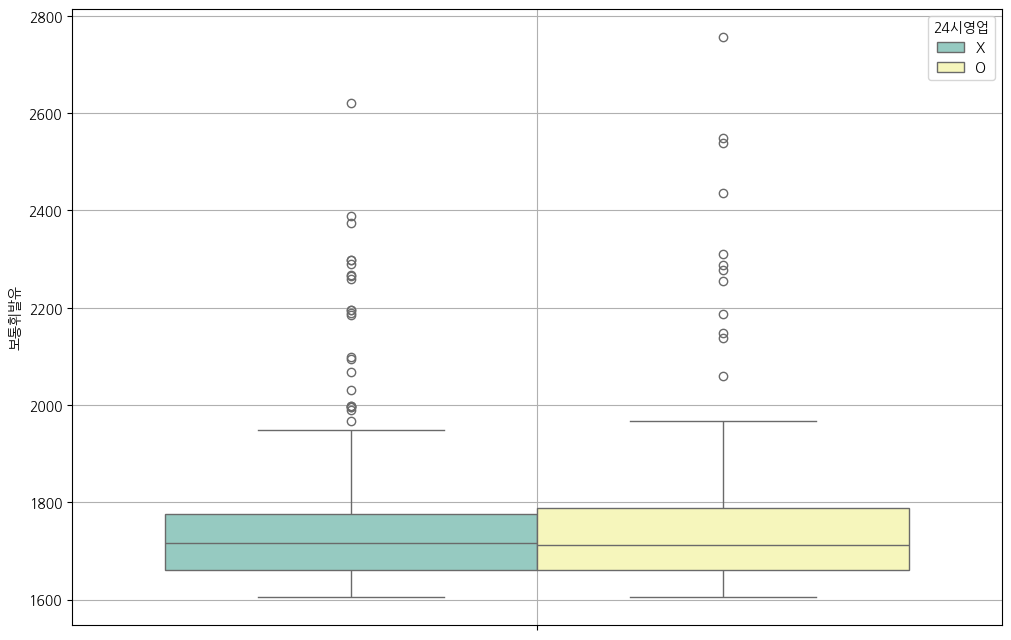

In [72]:
#24시간 영업 유무에 따른 유가(보통휘발유) 추이
plt.figure(figsize=(12,8))
sns.boxplot(hue="24시영업", y="보통휘발유", data=seoul_oil_df, palette="Set3")
plt.grid(True)
plt.show()

## 분석 3. 지도 시각화 - 각 주유소 위치 및 유가 확인

In [59]:
# 구별 보통휘발유 평균 유가 데이터
import json
import folium
import warnings
import numpy as np

gu_data = pd.pivot_table(data=seoul_oil_df, index="구", values="보통휘발유", aggfunc="mean")
gu_data.head()

,보통휘발유
구,
강남구,1952.500000
강동구,1785.153846
강북구,1668.200000
강서구,1701.727273
관악구,1749.357143


In [60]:
# 구별 보통휘발유 유가 지도
geo_path = "../data/02. skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding="utf-8"))

map_1 = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles="openStreetMap")
setting = folium.Choropleth(geo_data=geo_str,
                data=gu_data,
                columns=[gu_data.index, "보통휘발유"],
                key_on="feature.id",
                fill_color="PuRd")
setting.add_to(map_1)
map_1

In [ ]:
# 구별 경유 유가 지도
gu_data = pd.pivot_table(data=seoul_oil_df, index="구", values="경유", aggfunc="mean")

map_2 = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles="openStreetMap")
setting_2 = folium.Choropleth(geo_data=geo_str,
                data=gu_data,
                columns=[gu_data.index, "경유"],
                key_on="feature.id",
                fill_color="PuRd")
setting_2.add_to(map_2)
map_2

In [64]:
# 구별 고급휘발유 유가 지도
deluxe_oil_data = seoul_oil_df[seoul_oil_df['고급휘발유'] != 0]
gu_data = pd.pivot_table(data=deluxe_oil_data, index="구", values="고급휘발유", aggfunc="mean")

map_3 = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles="openStreetMap")
setting_3 = folium.Choropleth(geo_data=geo_str,
                data=gu_data,
                columns=[gu_data.index, "고급휘발유"],
                key_on="feature.id",
                fill_color="PuRd")
setting_3.add_to(map_3)
map_3

In [65]:
# 구별 실내등유 유가 지도
kero_oil_data = seoul_oil_df[seoul_oil_df['실내등유'] != 0]
gu_data = pd.pivot_table(data=deluxe_oil_data, index="구", values="실내등유", aggfunc="mean")

map_4 = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles="openStreetMap")
setting_4 = folium.Choropleth(geo_data=geo_str,
                data=gu_data,
                columns=[gu_data.index, "실내등유"],
                key_on="feature.id",
                fill_color="PuRd")
setting_4.add_to(map_4)
map_4

In [73]:
# CSV 파일로 저장
seoul_oil_df.to_csv("../data/seoul_station_info.csv", encoding="utf-8")